# **Data 620 Week 10/11 Assignment**
Seung Min Song, Krutika Patel<br>

04/13/2024


It can be useful to be able to classify new "test" documents using already classified "training" documents.  A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam.  Here is one example of such data:  [UCI Machine Learning Repository: Spambase Data Set](http://archive.ics.uci.edu/ml/datasets/Spambase)

For this project, you can either use the above dataset to predict the class of new documents (either withheld from the training dataset or from another source such as your own spam folder).

For more adventurous students, you are welcome (encouraged!) to come up a different set of documents (including scraped web pages!?) that have already been classified (e.g. tagged), then analyze these documents to predict how new documents should be classified.

This assignment is due end of day on 4/8.

NOTE: This is a two week assignment.

In [63]:
import nltk
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier


In [64]:
spam = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', sep = ",", header = None)

In [65]:
spam.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [66]:
names = ["word_freq_make",
 "word_freq_address",
 "word_freq_all",
 "word_freq_3d",
 "word_freq_our",
 "word_freq_over",
 "word_freq_remove",
 "word_freq_internet",
 "word_freq_order",
 "word_freq_mail",
 "word_freq_receive",
 "word_freq_will",
 "word_freq_people",
 "word_freq_report",
 "word_freq_addresses",
 "word_freq_free",
 "word_freq_business",
 "word_freq_email",
 "word_freq_you",
 "word_freq_credit",
 "word_freq_your",
 "word_freq_font",
 "word_freq_000",
 "word_freq_money",
 "word_freq_hp",
 "word_freq_hpl",
 "word_freq_george",
 "word_freq_650",
 "word_freq_lab",
 "word_freq_labs",
 "word_freq_telnet",
 "word_freq_857",
 "word_freq_data",
 "word_freq_415",
 "word_freq_85",
 "word_freq_technology",
 "word_freq_1999",
 "word_freq_parts",
 "word_freq_pm",
 "word_freq_direct",
 "word_freq_cs",
 "word_freq_meeting",
 "word_freq_original",
 "word_freq_project",
 "word_freq_re",
 "word_freq_edu",
 "word_freq_table",
 "word_freq_conference",
 "char_freq_;",
 "char_freq_(",
 "char_freq_[",
 "char_freq_!",
 "char_freq_$",
 "char_freq_#",
 "capital_run_length_average",
 "capital_run_length_longest",
 "capital_run_length_total",
 "spam"]
spam.columns = names


In [67]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Split target and features

In [68]:
# Assuming spam is your DataFrame
print(spam.columns)


Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


**Correlation**

Looking at the picture, you can see that words and letters such as your, 000, remove, $, you, free, and business have the highest correlation with whether or not it is spam.

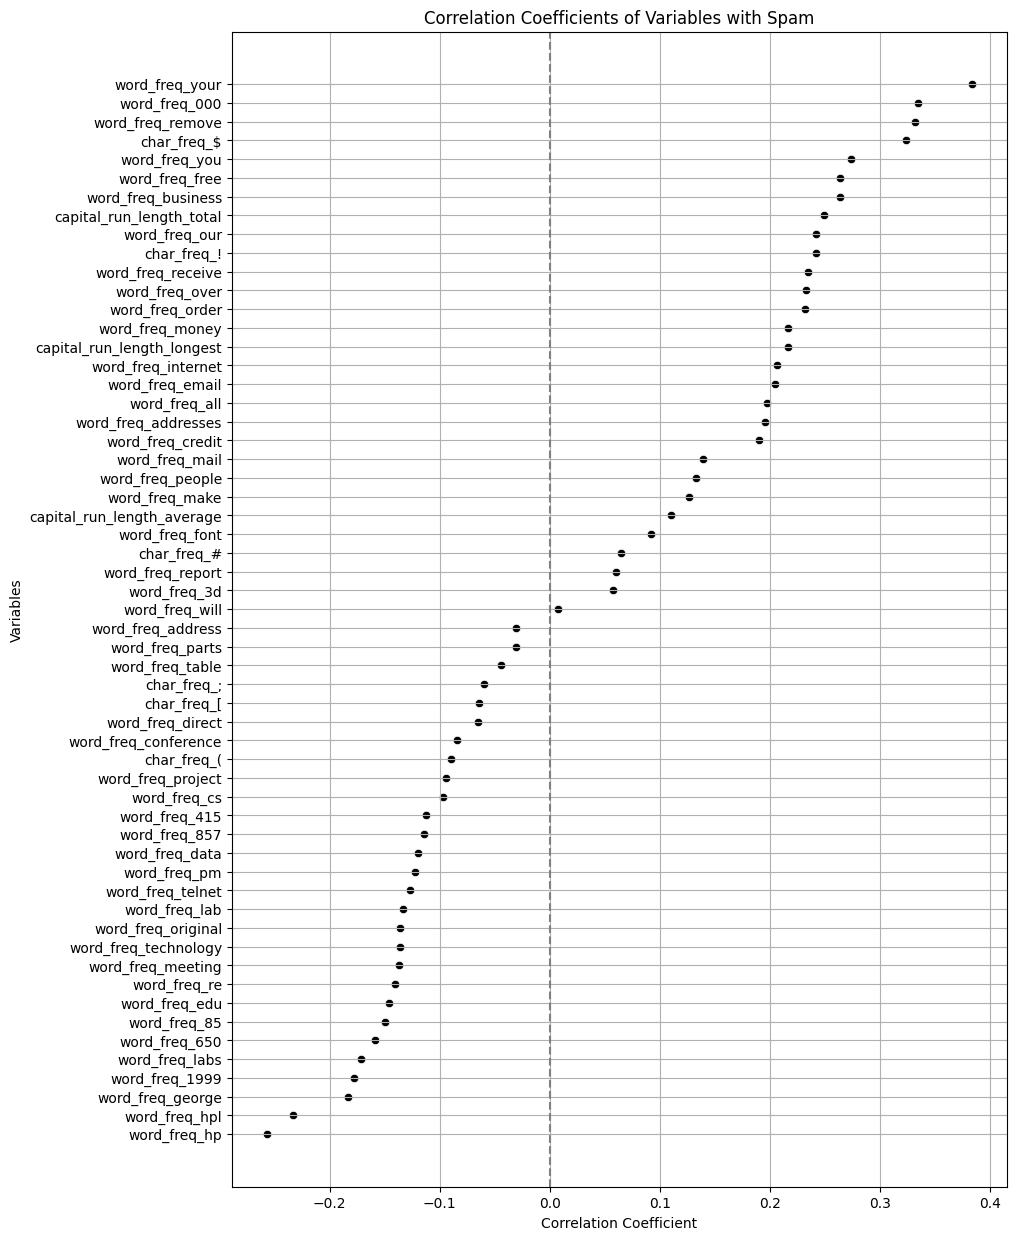

In [69]:
correlations = spam.drop(columns='spam').apply(lambda x: x.corr(spam['spam']))

cor_df = pd.DataFrame(correlations, columns=['cor']).reset_index().rename(columns={'index': 'variable'})
cor_df = cor_df.sort_values(by='cor', ascending=False)

# Plotting
plt.figure(figsize=(10, 15))
sns.scatterplot(data=cor_df, x='cor', y='variable', color='black')
# Customize the plot
plt.axvline(x=0, color='grey', linestyle='--')
plt.title('Correlation Coefficients of Variables with Spam')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)
plt.show()


In [70]:
target = spam['spam']
features = spam.drop('spam', axis = 1)

Split training and testing set

In [71]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, stratify = target)

Test options and evluvation

In [72]:
# Evaluate Algorithms
# Test options and evaluate metric
num_folds=10
scoring='accuracy'

Models

In [73]:
#models to be used

models=[]
models.append(('RFC',RandomForestClassifier()))
models.append(('GB',GradientBoostingClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='scale')))
#models.append(('LGBM', LGBMClassifier()))


Results

In [74]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=num_folds)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

RFC:0.948696(0.012504)
GB:0.940870(0.013913)
LDA:0.882899(0.013731)
KNN:0.794783(0.021527)
NB:0.820580(0.018983)
SVM:0.704928(0.032967)


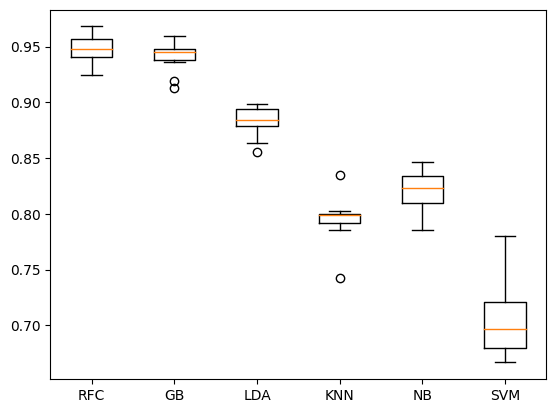

In [75]:
# Compare Algorithms distribution accuracy
fig=pyplot.figure()
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()